In [22]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.cross_validation import train_test_split,KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
#loading dataset
df = pd.read_csv('Data/adult.data.txt',names = ['age','workclass','fnlwgt','education','education.num',
                                               'marital.status','occupation','relationship','race','sex',
                                               'capital.gain','capital.loss','hours.per.week','native.country','income'])

In [6]:
#loading dataset
df = pd.read_csv('Data/student-mat.csv', sep=";")

In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
#number of features
print ("Number of features : {}".format(len(df.columns.values)))
print ("Number of sample : {}".format(df.shape[0]))

Number of features : 33
Number of sample : 395


Out of these 15 features 'Salary' is the target feature and rest all are covariates.

In [9]:
#let see if any cloumn has missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

It is clear that none on the column has any Nan values. Since number of samples in each column = total number of samples = 395

Let's classify features into numerical and categorical:

Numerical features:

- age           
- Medu          
- Fedu          
- traveltime    
- studytime     
- failures      
- famrel        
- freetime      
- goout         
- Dalc          
- Walc          
- health        
- absences      
- G1            
- G2            
- G3 

Categorical features:

- school        
- sex           
- address       
- famsize       
- Pstatus       
- Mjob          
- Fjob          
- reason        
- guardian      
- schoolsup     
- famsup        
- paid          
- activities    
- nursery       
- higher        
- internet      
- romantic 


Let's see the classes of the categorical variables

In [11]:
print('school\n',set(df['school']))
print('\nsex\n',set(df['sex']))
print('\naddress\n',set(df['address']))
print('\nfamsize\n',set(df['famsize']))
print('\nPstatus\n',set(df['Pstatus']))
print('\nMjob\n',set(df['Mjob']))
print('\nFjob\n',set(df['Fjob']))
print('\nreason\n',set(df['reason']))
print('\nguardian\n',set(df['guardian']))
print('\nschoolsup\n',set(df['schoolsup']))
print('\nfamsup\n',set(df['famsup']))
print('\npaid\n',set(df['paid']))
print('\nactivities\n',set(df['activities']))
print('\nnursery\n',set(df['nursery']))
print('\nhigher\n',set(df['higher']))
print('\nfamsup\n',set(df['famsup']))
print('\ninternet\n',set(df['internet']))
print('\nromantic\n',set(df['romantic']))

school
 {'MS', 'GP'}

sex
 {'F', 'M'}

address
 {'R', 'U'}

famsize
 {'LE3', 'GT3'}

Pstatus
 {'T', 'A'}

Mjob
 {'other', 'health', 'at_home', 'teacher', 'services'}

Fjob
 {'health', 'other', 'teacher', 'services', 'at_home'}

reason
 {'course', 'reputation', 'other', 'home'}

guardian
 {'father', 'other', 'mother'}

schoolsup
 {'yes', 'no'}

famsup
 {'yes', 'no'}

paid
 {'yes', 'no'}

activities
 {'yes', 'no'}

nursery
 {'yes', 'no'}

higher
 {'yes', 'no'}

famsup
 {'yes', 'no'}

internet
 {'yes', 'no'}

romantic
 {'yes', 'no'}


As we can see that in workclass and occupation we have unknown class '?'.Now let's represent categorical data in terms of numerical dummy variables

In [12]:
df.school = df.school.map({'MS':0 , 'GP':1})
df.sex = df.sex.map({'F':0 , 'M':1})
df.address = df.address.map({'R':0 , 'U':1})
df.famsize = df.famsize.map({'LE3':0 , 'GT3':1})
df.Pstatus = df.Pstatus.map({'T':0 , 'A':1})
df.Mjob = df.Mjob.map({'other':0, 'health':1, 'at_home':2, 'teacher':3, 'services':4})
df.Fjob = df.Fjob.map({'health':0, 'other':1, 'teacher':2, 'services':3, 'at_home':4})
df.reason = df.reason.map({'course':0, 'reputation':1, 'other':2, 'home':3})
df.guardian = df.guardian.map({'father':0, 'other':1, 'mother':2})
df.schoolsup = df.schoolsup.map({'yes':0, 'no':1})
df.famsup = df.famsup.map({'yes':0, 'no':1})
df.paid = df.paid.map({'yes':0, 'no':1})
df.activities = df.activities.map({'yes':0, 'no':1})
df.nursery = df.nursery.map({'yes':0, 'no':1})
df.higher = df.higher.map({'yes':0, 'no':1})
df.internet = df.internet.map({'yes':0, 'no':1})
df.romantic = df.romantic .map({'yes':0, 'no':1})

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,18,1,1,1,4,4,2,2,...,4,3,4,1,1,3,6,5,6,6
1,1,0,17,1,1,0,1,1,2,1,...,5,3,3,1,1,3,4,5,5,6
2,1,0,15,1,0,0,1,1,2,1,...,4,3,2,2,3,3,10,7,8,10
3,1,0,15,1,1,0,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,1,0,16,1,1,0,3,3,0,1,...,4,3,2,1,2,5,4,6,10,10


### Feature engineering usinf Recursive Feature Elimination and Feature importance ranking

The Recursive Feature Elimination (RFE) method is a feature selection approach. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [14]:
features = df.drop('Mjob',axis=1)
target = df.Mjob
set(df.Mjob)

{0, 1, 2, 3, 4}

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [16]:
#define a classifier
model = LogisticRegression()

#create RFE model to return top 3 attributes
rfe = RFE(model,3)
rfe = rfe.fit(features,target)

#summarise the selection of attributes
print(rfe.support_)
print(rfe.ranking_)
print(features.columns.values)

[ True False False False False False  True False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False]
[ 1  3 16  8  5  6  1 14 10 24 12  2 22  7 13  9 11 20 17  4  1 15 25 26 23
 18 19 21 30 27 28 29]
['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Fjob'
 'reason' 'guardian' 'traveltime' 'studytime' 'failures' 'schoolsup'
 'famsup' 'paid' 'activities' 'nursery' 'higher' 'internet' 'romantic'
 'famrel' 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences' 'G1' 'G2'
 'G3']


So the top three features as per RFE are

- educational-num
- marital status
- relationships
- race

Let's use Feature Importance to identify the top 3 features

Methods that use ensembles of decision trees (like Random Forest or Extra Trees) can also compute the relative importance of each attribute. These importance values can be used to inform a feature selection process.

This recipe shows the construction of an Extra Trees ensemble of the dataset and the display of the relative feature importance.

In [17]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

#define and fit a ExtraTreeClassifier to the data
model = ExtraTreesClassifier()
model.fit(features,target)

#display the feature importance
print(model.feature_importances_)
print('\n',features.columns.values)

[ 0.01686613  0.0280066   0.03690714  0.01881159  0.02360573  0.01450426
  0.08688076  0.04465319  0.03971032  0.03588536  0.02965435  0.02933128
  0.03180207  0.02767438  0.01893985  0.02122069  0.03033986  0.02586405
  0.01538157  0.00712966  0.02021333  0.02385868  0.03784451  0.03424342
  0.03177079  0.02679354  0.03085185  0.0352708   0.05429441  0.03966545
  0.03959107  0.0424333 ]

 ['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Fjob'
 'reason' 'guardian' 'traveltime' 'studytime' 'failures' 'schoolsup'
 'famsup' 'paid' 'activities' 'nursery' 'higher' 'internet' 'romantic'
 'famrel' 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences' 'G1' 'G2'
 'G3']


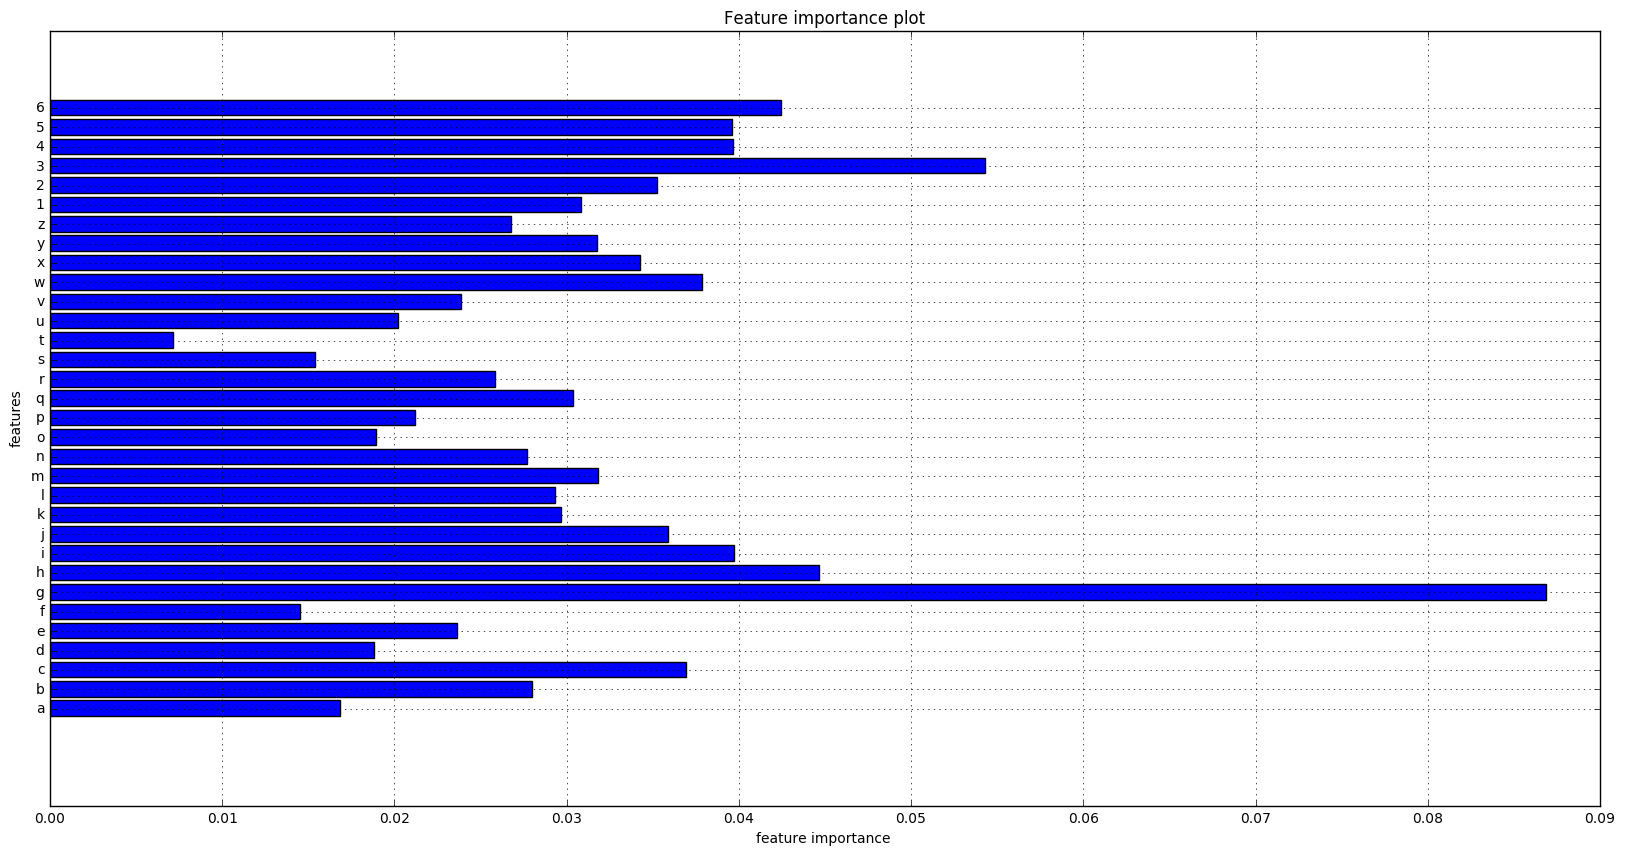

In [24]:
#bar plot of feature importance
values = model.feature_importances_
pos = np.arange(32) + 0.02
plt.barh(pos,values,align = 'center')
plt.title('Feature importance plot')
plt.xlabel('feature importance ')
plt.ylabel('features')
plt.yticks(np.arange(32),('a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i'
 'j' 'k' 'l' 'm' 'n' 'o'
 'p' 'q' 'r' 's' 't' 'u' 'v'
 'w' 'x' 'y' 'z' '1' '2' '3' '4' '5'
 '6'))
plt.grid(True)

So according to feature importance method, top 3 features are fnlwgt,age,hours-per-week.

Let's create training and testing datasets

Accuracy for 8 is 0.46464646464646464


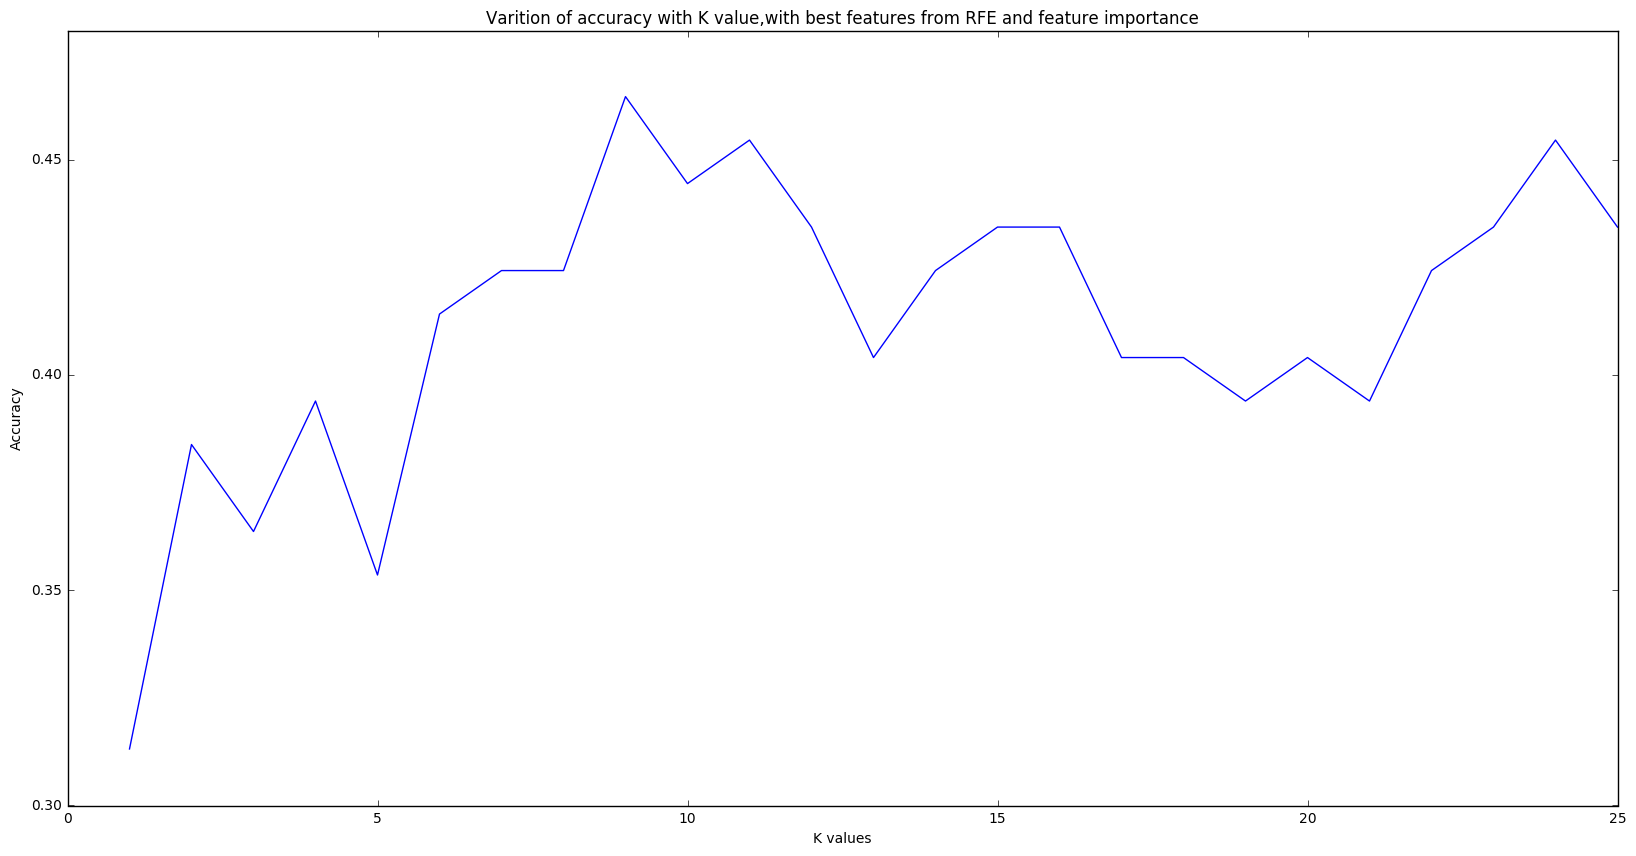

In [25]:
#updating features: combining best features from both RFE and feature importance
features = features[['school','Medu','internet','absences','Fedu','Pstatus']]

#here we have consider best features from both RFE and feature importance results

#spliting data into train and test data
X_train,X_test,y_train,y_test = train_test_split(features,target,random_state = 12)

from sklearn.neighbors import KNeighborsClassifier

k_values = np.arange(1,26)
scores = []

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_predict))

print("Accuracy for {} is {}".format(np.argmax(scores),max(scores)))

plt.plot(np.arange(1,26),scores)
plt.title('Varition of accuracy with K value,with best features from RFE and feature importance')
plt.xlabel('K values')
plt.ylabel('Accuracy')

Accuracy for 15 is 0.8186954919543054


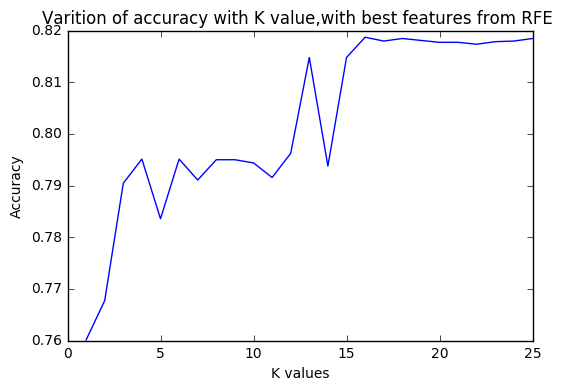

In [14]:
#Let's update features with the results of RFE and evaluate how
#accuracy varies

features1 = features[['school','Medu','internet','absences','Fedu','Pstatus']]

X_train,X_test,y_train,y_test = train_test_split(features1,target,random_state = 12)

from sklearn.neighbors import KNeighborsClassifier

k_values = np.arange(1,26)
scores = []

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_predict))

print("Accuracy for {} is {}".format(np.argmax(scores),max(scores)))

plt.plot(np.arange(1,26),scores)
plt.title('Varition of accuracy with K value,with best features from RFE ')
plt.xlabel('K values')
plt.ylabel('Accuracy')

Accuracy for 21 is 0.7555582852229455


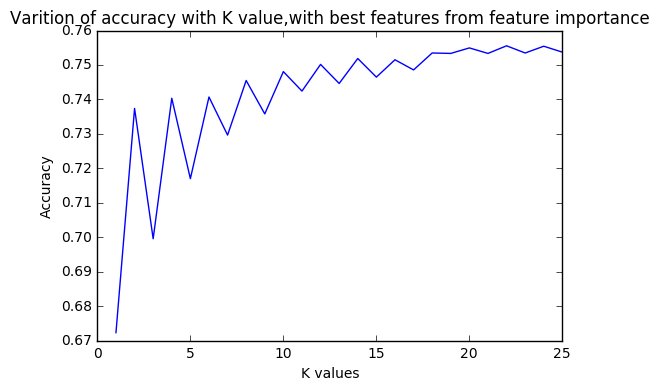

In [15]:
#Let's update features with the results of feature importance and evaluate how
#accuracy varies

features2 = features[['age','fnlwgt']]

X_train,X_test,y_train,y_test = train_test_split(features2,target,random_state = 12)

from sklearn.neighbors import KNeighborsClassifier

k_values = np.arange(1,26)
scores = []

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_predict))

print("Accuracy for {} is {}".format(np.argmax(scores),max(scores)))

plt.plot(np.arange(1,26),scores)
plt.title('Varition of accuracy with K value,with best features from feature importance')
plt.xlabel('K values')
plt.ylabel('Accuracy')

What is the need of comparing all three results (ie features from both RFE and feature importance,from RFE only and from feature importance only)?

In case of KNN, model works well when the input dimensions are small, as the input dimension increases the  performance of KNN decreases, because increase in dimension weakens the most important assumption on which KNN is built, which is  that closer points belongs to same class.

For more info, you can refer :[K-Nearest Neighbors for Machine Learning](http://machinelearningmastery.com/k-nearest-neighbors-for-machine-learning/)